The notebook is done by : May Selmi , Sahar Heni , Imen Lakhal.
Scrum Master : Eya Methanani .

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, precision_score,
                            recall_score, accuracy_score, f1_score,
                             make_scorer)
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold

# Undrestanding data

In [ ]:
df =pd.read_csv('non-verbal tourist data.csv')

In [ ]:
df.shape

(73, 23)

In [ ]:
df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [ ]:
print('Number of missing values per column')
for colm in df.columns:
  n_mv=df[colm].isnull().sum()
  print(f'{colm}: {n_mv}')

Number of missing values per column
sex: 0
age: 0
country: 0
returning: 0
GImg1: 0
GImg2: 0
GImg3: 0
PImg1: 0
PImg2: 0
PImg3: 0
PImg4: 0
PImg5: 0
Tense - relaxed: 0
Authoritative -anarchic : 0
Hostile - friendly: 0
TAudio1: 0
TAudio2: 0
TAudio3: 0
QAudio1: 0
QAudio2: 0
QAudio3: 0
Proxemics: 0
Type of Client: 0


In [ ]:
num_split = df.loc[ : , df.dtypes!=object]
num_split.head()

,age,Tense - relaxed,Hostile - friendly,Type of Client
0,42,4,3,0
1,60,2,1,0
2,25,5,5,0
3,43,3,1,0
4,30,3,3,0


**Central Tendency**

In [ ]:
df.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client
count,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151
std,15.115323,1.523160,1.467429,1.226142
min,24.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000
50%,47.000000,2.000000,2.000000,2.000000
75%,56.000000,3.000000,3.000000,3.000000
max,81.000000,5.000000,6.000000,5.000000


In [ ]:
for column_name in df.columns:
    print(df[column_name].mode())
    print(df[column_name].value_counts())

0    F
Name: sex, dtype: object
sex
F    38
M    35
Name: count, dtype: int64
0    56
Name: age, dtype: int64
age
56    6
53    4
25    3
38    3
39    3
36    3
48    3
58    3
42    2
67    2
26    2
40    2
46    2
63    2
49    2
34    2
27    2
28    2
51    2
30    2
24    1
80    1
47    1
29    1
43    1
41    1
77    1
81    1
31    1
64    1
71    1
55    1
66    1
76    1
45    1
65    1
78    1
33    1
60    1
37    1
61    1
Name: count, dtype: int64
0    england
Name: country, dtype: object
country
england      25
canada       18
germany       4
argentina     3
polish        3
scotland      3
italy         3
russia        3
spain         3
hungary       2
uruguay       1
brasil        1
colombia      1
chile         1
cuba          1
mexico        1
Name: count, dtype: int64
0    yes
Name: returning, dtype: object
returning
yes    38
no     35
Name: count, dtype: int64
0    likes
Name: GImg1, dtype: object
GImg1
likes         50
indiferent    17
dislikes       6
Name: cou

**Dispersion**

In [ ]:
def range_imp(dat):
  return (dat.max()-dat.min())

for column_name in num_split.columns:
    print('For', column_name, 'the range is', range_imp(num_split[column_name]))

For age the range is 57
For Tense - relaxed the range is 4
For Hostile - friendly the range is 5
For Type of Client the range is 5


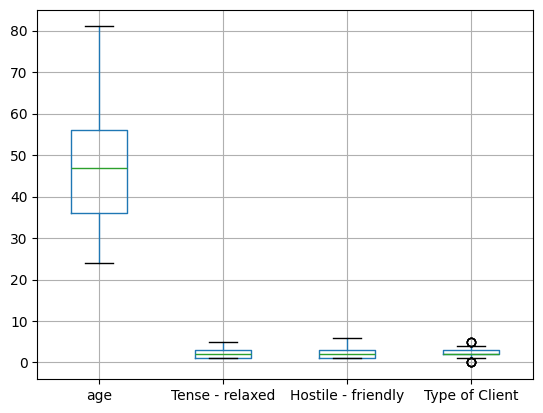

In [ ]:
num_split.boxplot()
plt.show()

**Interpretation :** Wide range for age , and for the rest of the data we have a minimal range

In [ ]:
print( "Variance: ", num_split.var())
print("Std: " , num_split.std())

Variance:  age                   228.472983
Tense - relaxed         2.320015
Hostile - friendly      2.153349
Type of Client          1.503425
dtype: float64
Std:  age                   15.115323
Tense - relaxed        1.523160
Hostile - friendly     1.467429
Type of Client         1.226142
dtype: float64


**Interpretation :**
-The Age feature has the highest variance and standard deviation, indicating it has the widest range of data points and the greatest level of diversity among the features.

-The Tense - Relaxed and Hostile - Friendly features have moderate variability, implying that individuals may rate similarly on these scales, with some variation.

-The Type of Client has the lowest variance and standard deviation, suggesting it is the most consistent feature, with little spread among the data points.

**Symmetry**

In [ ]:
num_split.skew()

age                   0.350822
Tense - relaxed       0.878439
Hostile - friendly    1.047375
Type of Client        0.132461
dtype: float64

**Interpretation:**
- Age and Type of client have skewness closer to zero which indicates that they are symmetrical and likely follow a normal distribution
- As for the rest they have a higher skewness indicating that their distributions are more skewed with tails extending to the right, showing some higher outliers.


In [ ]:
#Kurtosis
num_split.kurtosis()

age                  -0.639574
Tense - relaxed      -0.779010
Hostile - friendly   -0.041362
Type of Client       -0.150400
dtype: float64

**Interpretation:**
- They all have neggative kurtosis suggestiong that the distribution have flatter peaks and thinner tails meaning they have few outliners.
- Hostile -Friendly is so close to 0 it is almost normal in terms of behavior


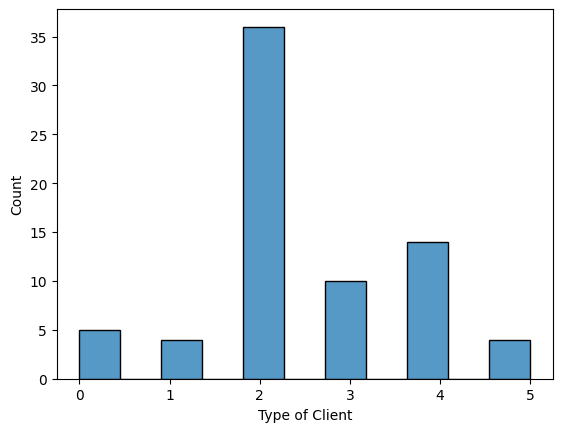

In [ ]:
sns.histplot(df, x='Type of Client')
plt.show()

# Missing Values

In [ ]:
df.isnull()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in df.columns :
    print(f'{column}' ,df[column].unique())

sex ['F' 'M']
age [42 60 25 43 30 31 64 51 28 78 36 33 37 56 53 55 67 24 58 34 61 48 49 39
 63 65 45 76 66 71 80 46 40 81 77 38 41 26 29 47 27]
country ['uruguay' 'brasil' 'england' 'canada' 'hungary' 'argentina' 'polish'
 'colombia' 'scotland' 'chile' 'germany' 'cuba' 'italy' 'russia' 'mexico'
 'spain']
returning ['no' 'yes']
GImg1 ['likes' 'indiferent' 'dislikes']
GImg2 ['indiferent' 'dislikes' 'likes']
GImg3 ['indiferent' 'dislikes' 'likes' '?']
PImg1 ['likes' 'indiferent']
PImg2 ['likes']
PImg3 ['indiferent' 'likes' 'dislikes']
PImg4 ['indiferent' 'likes' 'dislikes']
PImg5 ['dislikes' '?' 'indiferent']
Tense - relaxed [4 2 5 3 1]
Authoritative -anarchic  ['8' '9' '10' '2' '3' '4' '1' '7' '6' '5' '?']
Hostile - friendly [3 1 5 2 4 6]
TAudio1 ['C' 'B' 'A' 'D']
TAudio2 ['dislikes' 'indiferent']
TAudio3 ['dislikes' 'indiferent' 'likes']
QAudio1 ['indiferent' 'likes' 'dislikes']
QAudio2 ['dislikes' 'likes' 'indiferent']
QAudio3 ['dislikes' 'indiferent' 'likes']
Proxemics ['dislikes' 'in

In [ ]:
df.drop(['PImg2'], axis=1, inplace=True)

**Remark :** we can see that PImg2 presents a single value across the entire dataset, so it was decided to remove this column.

In [ ]:
df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,indiferent,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,indiferent,likes,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,indiferent,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,indiferent,likes,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


In [ ]:
nominal_features = ['GImg1', 'GImg2', 'GImg3',
                    'PImg1', 'PImg3', 'PImg4', 'PImg5',
                     'TAudio2', 'TAudio3',
                    'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics']

In [ ]:
df[nominal_features].head()

,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics
0,likes,indiferent,indiferent,likes,indiferent,indiferent,dislikes,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes
1,likes,indiferent,indiferent,likes,likes,likes,?,dislikes,dislikes,likes,likes,dislikes,dislikes
2,indiferent,indiferent,indiferent,likes,indiferent,likes,dislikes,dislikes,dislikes,likes,dislikes,dislikes,dislikes
3,likes,dislikes,dislikes,likes,indiferent,indiferent,dislikes,dislikes,dislikes,likes,dislikes,indiferent,dislikes
4,indiferent,indiferent,indiferent,likes,indiferent,likes,dislikes,dislikes,dislikes,likes,indiferent,dislikes,dislikes


In [ ]:
pd.crosstab(**df[nominal_features].melt(var_name='columns', value_name='index'))

columns,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,Proxemics,QAudio1,QAudio2,QAudio3,TAudio2,TAudio3
index,,,,,,,,,,,,,
?,0,0,1,0,0,0,2,0,0,0,0,0,0
dislikes,6,12,12,0,18,15,70,63,4,62,60,59,56
indiferent,17,22,19,3,10,17,1,8,5,10,11,14,15
likes,50,39,41,70,45,41,0,2,64,1,2,0,2


In [ ]:
print(" ? in GImg3: " , (df['GImg3'] == '?').sum())
print(" ? in PImg5: " , (df['PImg5'] == '?' ).sum())
print(" ? in Authoritative -anarchic : " , (df['Authoritative -anarchic '] == '?' ).sum())

 ? in GImg3:  1
 ? in PImg5:  2
 ? in Authoritative -anarchic :  1


**Remark:** We can drop the rows having null values because they are minimum in number

In [ ]:
df['GImg3'] = df['GImg3'].replace('?', 'unknown')
df['PImg5'] = df['PImg5'].replace('?', 'unknown')
df['Authoritative -anarchic '] = df['Authoritative -anarchic '].replace('?', 'unknown')

In [ ]:
df.shape

(73, 22)

In [ ]:
value_counts = pd.crosstab(**df[nominal_features].melt(var_name='columns', value_name='index'))
value_counts

columns,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,Proxemics,QAudio1,QAudio2,QAudio3,TAudio2,TAudio3
index,,,,,,,,,,,,,
dislikes,6,12,12,0,18,15,70,63,4,62,60,59,56
indiferent,17,22,19,3,10,17,1,8,5,10,11,14,15
likes,50,39,41,70,45,41,0,2,64,1,2,0,2
unknown,0,0,1,0,0,0,2,0,0,0,0,0,0


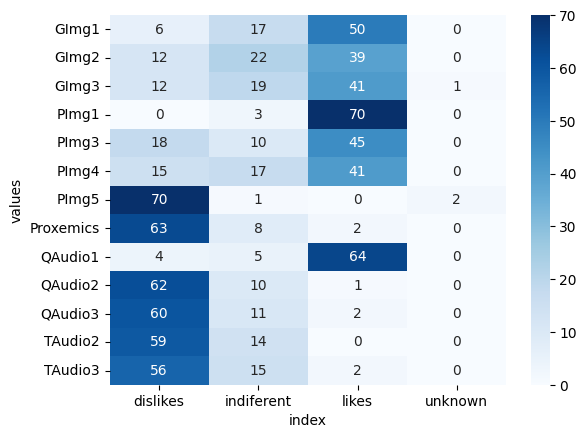

In [ ]:
ax = sns.heatmap(value_counts.transpose(), annot=True, cmap='Blues')
ax.set(ylabel='values')
plt.show()

In [ ]:
mode_value = df['Authoritative -anarchic '].mode()[0]
df.loc[df['Authoritative -anarchic '] == 'unknown', 'Authoritative -anarchic '] = mode_value
df['Authoritative -anarchic '] = df['Authoritative -anarchic '].astype(int)
print(df.head())


  sex  age  country returning       GImg1       GImg2       GImg3  PImg1  \
0   F   42  uruguay        no       likes  indiferent  indiferent  likes   
1   M   60   brasil        no       likes  indiferent  indiferent  likes   
2   F   25  england        no  indiferent  indiferent  indiferent  likes   
3   M   43   canada        no       likes    dislikes    dislikes  likes   
4   M   30  hungary        no  indiferent  indiferent  indiferent  likes   

        PImg3       PImg4  ... Authoritative -anarchic   Hostile - friendly  \
0  indiferent  indiferent  ...                        8                   3   
1       likes       likes  ...                        9                   1   
2  indiferent       likes  ...                       10                   5   
3  indiferent  indiferent  ...                        2                   1   
4  indiferent       likes  ...                        9                   3   

   TAudio1   TAudio2   TAudio3     QAudio1     QAudio2     QAudio3 P

In [ ]:
df['Authoritative -anarchic '] = df['Authoritative -anarchic '].astype(int)

In [ ]:
for column in df.columns :
    print(f'{column}' ,df[column].unique())

sex ['F' 'M']
age [42 60 25 43 30 31 64 51 28 78 36 33 37 56 53 55 67 24 58 34 61 48 49 39
 63 65 45 76 66 71 80 46 40 81 77 38 41 26 29 47 27]
country ['uruguay' 'brasil' 'england' 'canada' 'hungary' 'argentina' 'polish'
 'colombia' 'scotland' 'chile' 'germany' 'cuba' 'italy' 'russia' 'mexico'
 'spain']
returning ['no' 'yes']
GImg1 ['likes' 'indiferent' 'dislikes']
GImg2 ['indiferent' 'dislikes' 'likes']
GImg3 ['indiferent' 'dislikes' 'likes' 'unknown']
PImg1 ['likes' 'indiferent']
PImg3 ['indiferent' 'likes' 'dislikes']
PImg4 ['indiferent' 'likes' 'dislikes']
PImg5 ['dislikes' 'unknown' 'indiferent']
Tense - relaxed [4 2 5 3 1]
Authoritative -anarchic  [ 8  9 10  2  3  4  1  7  6  5]
Hostile - friendly [3 1 5 2 4 6]
TAudio1 ['C' 'B' 'A' 'D']
TAudio2 ['dislikes' 'indiferent']
TAudio3 ['dislikes' 'indiferent' 'likes']
QAudio1 ['indiferent' 'likes' 'dislikes']
QAudio2 ['dislikes' 'likes' 'indiferent']
QAudio3 ['dislikes' 'indiferent' 'likes']
Proxemics ['dislikes' 'indiferent' 'likes']


# Correlation

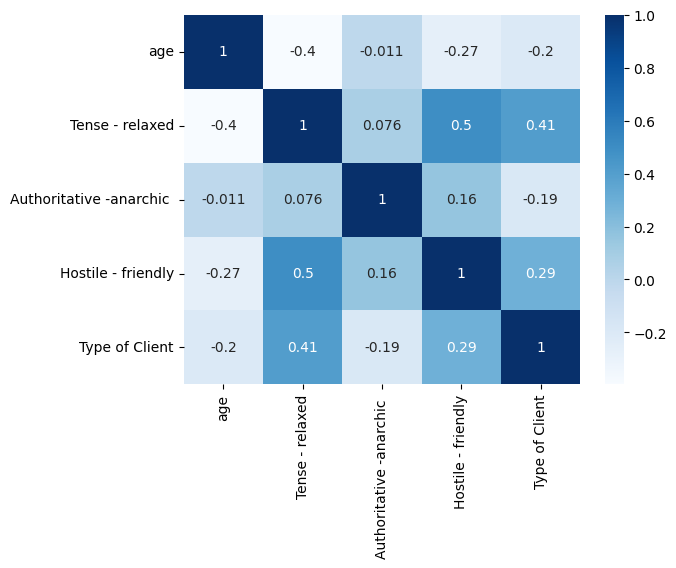

In [ ]:
sns.heatmap(df[['age' ,'Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly' ,'Type of Client']].corr(), annot=True, cmap='Blues')
plt.show()

# Handle Categorical data

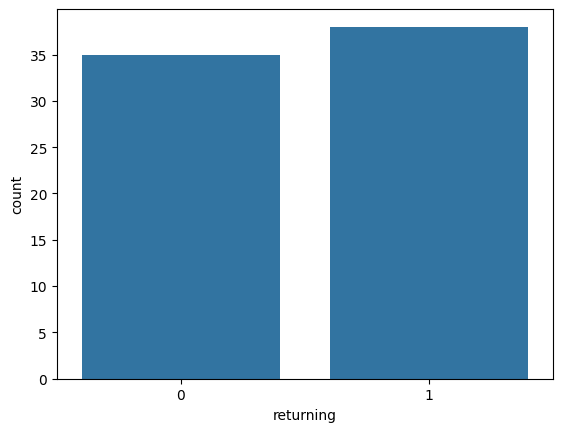

In [ ]:
# as it has only 2 possible values yes or no and it is the only one having those binary values
encoder= preprocessing.LabelEncoder()
encoder.fit(df['returning'])
df['returning'] = encoder.transform(df['returning'])
sns.countplot(df, x='returning')
plt.show()

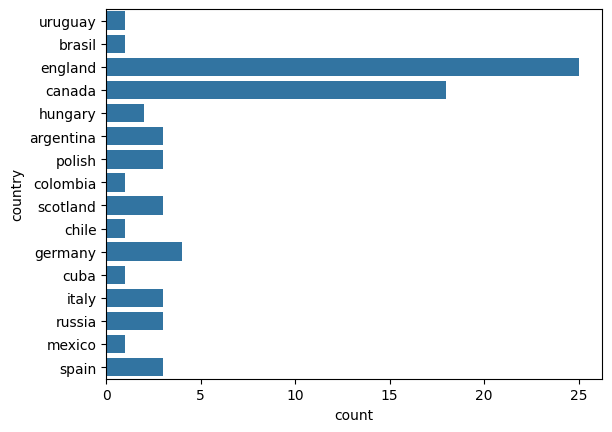

In [ ]:
sns.countplot(df, y='country')
plt.show()
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[['country']])

df[encoder.get_feature_names_out(['country'])] = encoded_array
df = df.drop('country', axis=1)

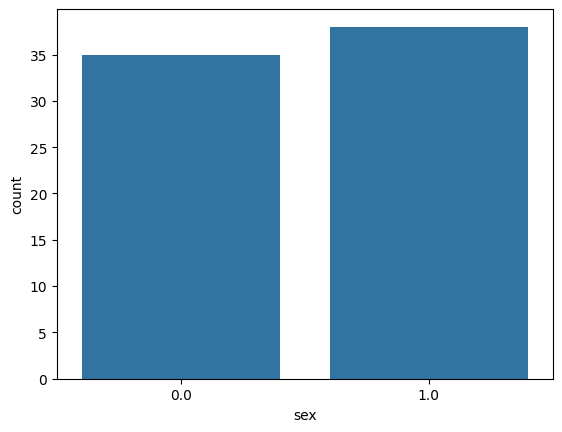

In [ ]:
df['sex'].unique()
encoder.fit(df[['sex']])  # Pass 'sex' as a DataFrame
df['sex'] = encoder.transform(df[['sex']])  # Also pass 'sex' as a DataFrame
sns.countplot(x=df['sex'])
plt.show()

In [ ]:
nominal_features = ['GImg1', 'GImg2', 'GImg3',
                    'PImg1','PImg3', 'PImg4', 'PImg5',
                     'TAudio2', 'TAudio3',
                    'QAudio1', 'QAudio2', 'QAudio3', 'Proxemics']
for feature in nominal_features:
    encoded_array = encoder.fit_transform(df[[feature]])

    encoded_columns = encoder.get_feature_names_out([feature])
    df[encoded_columns] = encoded_array

    df = df.drop(feature, axis=1)

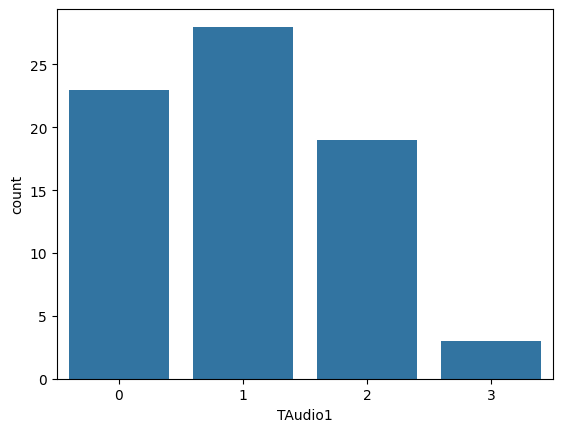

In [ ]:
#Non Verbal
df[['Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly', 'TAudio1']].head()
le = preprocessing.LabelEncoder()
le.fit(df['TAudio1'])
df['TAudio1'] = le.transform(df['TAudio1'])
sns.countplot(df, x='TAudio1')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       73 non-null     float64
 1   age                       73 non-null     int64  
 2   returning                 73 non-null     int64  
 3   Tense - relaxed           73 non-null     int64  
 4   Authoritative -anarchic   73 non-null     int64  
 5   Hostile - friendly        73 non-null     int64  
 6   TAudio1                   73 non-null     int64  
 7   Type of Client            73 non-null     int64  
 8   country_argentina         73 non-null     float64
 9   country_brasil            73 non-null     float64
 10  country_canada            73 non-null     float64
 11  country_chile             73 non-null     float64
 12  country_colombia          73 non-null     float64
 13  country_cuba              73 non-null     float64
 14  country_engl

In [ ]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,sex,age,returning,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,Type of Client,country_argentina,country_brasil,country_canada,country_chile,country_colombia,country_cuba,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay,GImg1_dislikes,GImg1_indiferent,GImg1_likes,GImg2_dislikes,GImg2_indiferent,GImg2_likes,GImg3_dislikes,GImg3_indiferent,GImg3_likes,GImg3_unknown,PImg1_indiferent,PImg1_likes,PImg3_dislikes,PImg3_indiferent,PImg3_likes,PImg4_dislikes,PImg4_indiferent,PImg4_likes,PImg5_dislikes,PImg5_indiferent,PImg5_unknown,TAudio2_dislikes,TAudio2_indiferent,TAudio3_dislikes,TAudio3_indiferent,TAudio3_likes,QAudio1_dislikes,QAudio1_indiferent,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio2_likes,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
sex,1.00,-0.15,-0.04,0.04,-0.08,0.06,0.03,0.03,-0.08,-0.12,-0.02,0.11,0.11,-0.12,-0.00,-0.13,-0.01,-0.22,0.11,0.06,0.06,0.06,0.20,0.11,-0.21,0.07,0.06,-0.17,0.03,0.09,-0.09,0.01,0.09,-0.12,0.06,-0.06,-0.02,-0.10,0.09,-0.12,0.20,-0.07,0.08,-0.12,-0.01,-0.12,0.12,0.06,-0.05,-0.01,-0.01,0.04,-0.03,-0.02,0.06,-0.12,0.13,-0.13,-0.01,-0.06,0.07,-0.01
age,-0.15,1.00,0.32,-0.40,-0.01,-0.27,-0.25,-0.20,0.10,0.10,0.12,0.26,0.05,-0.05,0.03,-0.04,-0.20,-0.05,-0.06,0.04,-0.09,0.04,-0.30,-0.04,-0.22,-0.17,0.28,-0.13,-0.17,0.25,-0.13,-0.23,0.32,-0.06,0.05,-0.05,-0.32,-0.01,0.30,-0.23,-0.07,0.25,-0.21,0.24,0.08,0.16,-0.16,-0.13,0.23,-0.23,0.01,-0.17,0.12,0.14,-0.18,0.10,-0.03,-0.02,0.11,-0.23,0.26,-0.01
returning,-0.04,0.32,1.00,-0.50,-0.20,-0.30,-0.58,-0.33,-0.08,-0.12,0.10,0.11,-0.12,-0.12,0.23,-0.13,-0.17,-0.08,-0.12,0.20,-0.22,0.20,-0.22,-0.12,-0.31,-0.38,0.53,-0.46,-0.21,0.53,-0.46,-0.12,0.48,-0.12,-0.22,0.22,-0.53,-0.10,0.54,-0.39,-0.18,0.48,-0.06,0.11,-0.01,0.02,-0.02,-0.40,0.42,-0.01,-0.25,-0.28,0.39,-0.10,0.14,-0.12,-0.16,0.10,0.16,-0.14,0.16,-0.01
Tense - relaxed,0.04,-0.40,-0.50,1.00,0.08,0.50,0.70,0.41,-0.17,-0.02,-0.30,-0.10,0.06,-0.02,-0.03,0.36,0.14,0.06,-0.02,-0.17,0.38,0.01,0.06,0.14,0.35,0.41,-0.58,0.59,0.08,-0.51,0.52,0.26,-0.67,0.22,0.20,-0.20,0.56,0.12,-0.59,0.37,0.34,-0.59,0.08,-0.10,-0.03,0.14,-0.14,0.17,-0.30,0.31,0.28,0.17,-0.33,0.12,-0.11,-0.02,0.17,-0.12,-0.14,0.19,-0.23,0.03
Authoritative -anarchic,-0.08,-0.01,-0.20,0.08,1.00,0.16,0.10,-0.19,0.27,0.15,-0.03,-0.12,0.11,-0.08,-0.24,-0.04,0.05,-0.02,0.19,-0.00,-0.09,0.18,0.09,0.11,-0.04,0.20,-0.16,-0.08,0.08,-0.02,-0.00,-0.07,0.07,-0.04,-0.07,0.07,0.04,0.07,-0.08,0.15,-0.18,0.03,0.02,-0.08,0.03,-0.06,0.06,0.10,-0.13,0.05,-0.08,-0.06,0.10,-0.13,0.09,0.15,0.10,-0.07,-0.08,0.07,-0.09,0.03
Hostile - friendly,0.06,-0.27,-0.30,0.50,0.16,1.00,0.33,0.29,-0.03,-0.10,-0.20,-0.10,-0.02,-0.02,0.08,0.21,0.09,-0.08,0.06,0.01,0.25,-0.13,-0.03,0.06,0.23,0.31,-0.42,0.31,0.10,-0.32,0.28,0.06,-0.29,0.14,0.11,-0.11,0.37,-0.04,-0.30,0.24,0.22,-0.39,0.08,-0.02,-0.08,0.05,-0.05,0.02,-0.06,0.09,0.04,0.07,-0.08,0.01,0.02,-0.10,-0.10,0.14,-0.08,0.06,-0.12,0.09
TAudio1,0.03,-0.25,-0.58,0.70,0.10,0.33,1.00,0.27,-0.01,-0.00,-0.31,-0.14,-0.00,-0.00,-0.09,0.27,0.19,0.15,-0.14,-0.09,0.31,-0.09,0.23,0.13,0.11,0.43,-0.46,0.63,0.19,-0.64,0.54,0.16,-0.58,0.13,0.15,-0.15,0.46,0.22,-0.56,0.42,0.25,-0.55,0.09,-0.14,-0.01,0.06,-0.06,0.28,-0.33,0.09,0.20,0.18,-0.28,0.06,-0.06,-0.00,0.14,-0.06,-0.20,0.43,-0.37,-0.20
Type of Client,0.03,-0.20,-0.33,0.41,-0.19,0.29,0.27,1.00,-0.14,-0.24,-0.18,-0.05,-0.05,0.05,0.02,0.30,-0.27,0.20,0.15,-0.08,0.31,-0.08,0.26,-0.24,0.53,0.28,-0.57,0.49,0.03,-0.39,0.46,0.04,-0.44,0.24,0.31,-0.31,0.76,-0.46,-0.35,0.60,0.04,-0.53,0.20,-0.05,-0.21,0.08,-0.08,0.12,-0.15,0.07,0.35,0.25,-0.43,0.30,-0.23,-0.24,0.10,-0.08,-0.07,-0.07,0.00,0.14
country_argentina,-0.08,0.10,-0.08,-0.17,0.27,-0.03,-0.01,-0.14,1.00,-0.02,-0.12,-0.02,-0.02,-0.02,-0.15,-0.05,-0.03,-0.04,-0.02,-0.04,-0.04,-0.04,-0.04,-0.02,-0.06,-0.11,0.14,-0.09,0.01,0.05,-0.09,-0.12,0.18,-0.02,-0.04

In [ ]:
df.shape

(73, 62)

In [ ]:
import numpy as np

# Find features with a high correlation (above the threshold)
threshold = 0.7
upper_triangle_matrix = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Identify feature pairs with a correlation above the threshold
highly_correlated = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]


In [ ]:
highly_correlated

['TAudio1',
 'GImg3_dislikes',
 'PImg3_dislikes',
 'PImg3_likes',
 'PImg5_unknown',
 'QAudio2_likes',
 'QAudio3_likes']

In [ ]:
df = df.drop(highly_correlated, axis=1)


In [ ]:
df.shape

(73, 55)

In [ ]:
X = df.drop('Type of Client', axis = 1)
y = df['Type of Client']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the shape after augmentation
print("Shape of X after augmentation:", X_resampled.shape)
print("Shape of y after augmentation:", y_resampled.shape)


Shape of X after augmentation: (216, 54)
Shape of y after augmentation: (216,)


In [ ]:
X_resampled

,sex,age,returning,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,country_argentina,country_brasil,country_canada,country_chile,...,QAudio1_dislikes,QAudio1_indiferent,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio3_dislikes,QAudio3_indiferent,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
0,1.000000,42,0,4,8,3,0.0,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000,0.000000
1,0.000000,60,0,2,9,1,0.0,1.0,0.000000,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,1.0,0.0,1.000000,0.000000,0.000000
2,1.000000,25,0,5,10,5,0.0,0.0,0.000000,0.0,...,0.0,0.000000,1.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000,0.000000
3,0.000000,43,0,3,2,1,0.0,0.0,1.000000,0.0,...,0.0,0.000000,1.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,0.000000
4,0.000000,30,0,3,9,3,0.0,0.0,0.000000,0.0,...,0.0,0.000000,1.000000,0.000000,1.000000,1.0,0.0,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.311711,32,0,3,6,4,0.0,0.0,1.000000,0.0,...,0.0,0.311711,0.688289,0.688289,0.311711,1.0,0.0,0.000000,0.311711,0.688289
212,0.000000,33,0,4,6,4,0.0,0.0,0.479932,0.0,...,0.0,0.520068,0.479932,1.000000,0.000000,1.0,0.0,0.520068,0.000000,0.479932
213,0.453290,35,0,3,5,3,0.0,0.0,1.000000,0.0,...,0.0,0.453290,0.546710,0.546710,0.453290,1.0,0.0,0.000000,0.453290,0.546710
214,0.184854,30,0,3,7,4,0.0,0.0,1.000000,0.0,...,0.0,0.184854,0.815146,0.815146,0.184854,1.0,0.0,0.000000,0.184854,0.815146


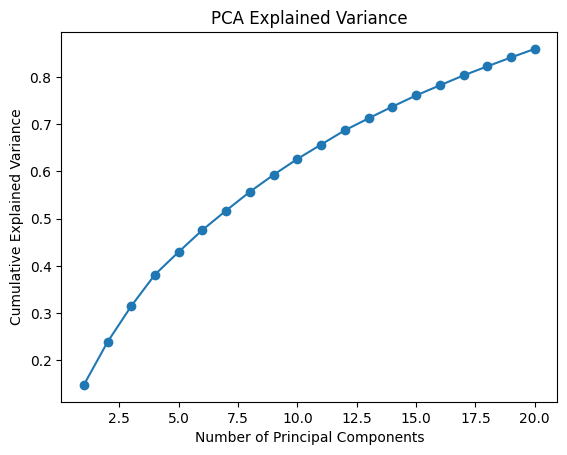

Shape of X after PCA: (216, 20)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

pca = PCA(n_components=20)  # keeping only 20
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.plot(range(1, 21), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# Print transformed shape
print("Shape of X after PCA:", X_pca.shape)


# Normalization and splitting

In [ ]:
X = X_pca
y = y_resampled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, stratify=y, random_state=111)

In [ ]:
features_to_normalize = ['age', 'Tense - relaxed', 'Hostile - friendly']

In [ ]:
# def get_normalizer():
#     return ColumnTransformer([("std_scaler", preprocessing.StandardScaler(), features_to_normalize)], remainder='passthrough')

**Remarks:**
-ColumnTransformer: This is a transformer that allows you to apply different preprocessing steps to different subsets of features in your dataset

In [ ]:
# normalizer = get_normalizer()
# normalizer.fit(X_train)
# X_train_sc = normalizer.transform(X_train)
# X_test_sc = normalizer.transform(X_test)

In [ ]:
X_train

array([[ 4.10621123,  2.55192444, -1.24761897, ...,  0.31849502,
         0.64183003, -1.53054663],
       [ 2.76250078, -0.34613006,  4.95675279, ...,  0.20392075,
         0.04099665, -0.31048035],
       [ 1.35066799, -0.78433391,  0.77670955, ..., -0.24273424,
         0.05094181, -0.54529052],
       ...,
       [ 0.62368013, -0.90002399, -0.65594969, ..., -0.14085988,
        -0.29774803,  0.37519552],
       [-1.21414883, -0.5073949 , -0.98330137, ..., -0.92525417,
        -0.10832342,  0.70385468],
       [ 1.07614167, -1.14472217,  2.02275793, ...,  0.21921096,
        -0.3450073 , -0.07026743]])

# Random Forest

In [ ]:
# def cross_validate_stratify(X: pd.DataFrame, y: pd.Series, pipeline: Pipeline, cv: int) -> dict:
#     accuracy = []
#     precision = []
#     recall = []
#     kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=111)
#     for train_index, test_index in kfold.split(X, y):
#         X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
#         y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#         pipeline.fit(X_train_fold, y_train_fold)

#         y_pred_fold = pipeline.predict(X_test_fold)
#         accuracy.append(accuracy_score(y_test_fold, y_pred_fold))
#         precision.append(precision_score(y_test_fold, y_pred_fold, average="weighted", zero_division=0)) # zero division = 0 because we have cases that could not be predicted
#         recall.append(recall_score(y_test_fold, y_pred_fold, average="weighted", zero_division=0))

#     return dict(accuracy=accuracy, precision=precision, recall=recall)

In [ ]:
# def get_pipeline(classifier: ClassifierMixin) -> Pipeline:
#     column_transformer = get_normalizer()
#     return Pipeline([('scaler', column_transformer), ('classifier', classifier)])

**Remarks :**
-The pipeline have 2 stages one to normalize the data and then pass it to the classifier!


In [ ]:
def plot_metrics(y_test: pd.Series, y_pred: np.array) -> None:
    print(classification_report(y_test, y_pred, zero_division=0))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
    plt.show()

In [ ]:
def evaluate_model(y_test: pd.Series, y_pred: np.array) -> None:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)

    print("Accuracy: %.2f" % accuracy)
    print("Precision: %.2f" % precision)
    print("Recall: %.2f" % recall)

    return accuracy, precision, recall


In [ ]:
random_forest =RandomForestClassifier()

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
base_accuracy, base_precision, base_recall = evaluate_model(y_test, y_pred)

Accuracy: 0.98
Precision: 0.98
Recall: 0.98


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00         7
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00         8

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



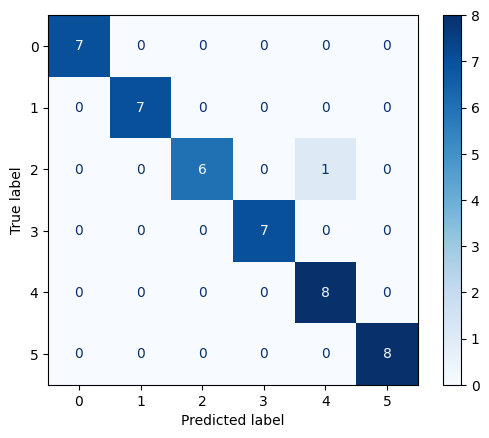

In [ ]:
plot_metrics(y_test, y_pred)

**Interpretation:**
- The model is performing excellently with an overall accuracy of 98%.
- It is particularly strong for Classes 0, 1, 3, and 5, achieving perfect precision, recall, and F1 scores.
- Class 4, while still performing well, shows slightly lower precision, indicating a higher rate of false positives compared to the other classes.
- There is a small trade-off in recall for Class 2, but the F1 score still suggests good performance.

